## 4-1. 퍼셉트론

### import

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
matplotlib 3.5.3
seaborn 0.12.2


### 예제 데이터셋 준비

### 1. 퍼셉트론

#### 가장 기본적인 인공 신경망으로 구성된 이진 분류기(Binary Classifier)

- 뉴런(Nuron): 입력을 받아 출력을 만드는 연산 단위로 노드(Node), 유닛(Unit)이라고도 함

- 신경 세포 뉴런의 동작을 수학적으로 단순화

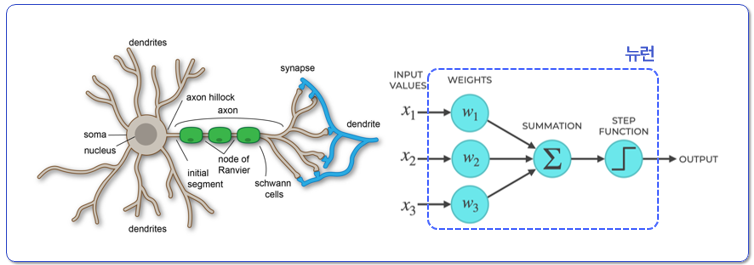

출처: https://www.sharpsightlabs.com/blog/perceptrons-explained/

#### 퍼셉트론의 구성과 연산

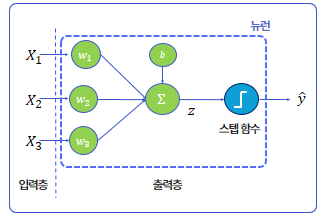

- 파라미터의 구성
> $w_i$: 가중치, b: 절편
> 
> 파라미터 수: 입력 + 1
- 연산
> $\hat{𝑦}=𝑓\left(\sum_{𝑖=1}^𝑛 \mathbf{w}_𝑖\mathbf{x}_𝑖+b\right)$
> 
> $x_i$: 입력
> 
> $f$: 스텝 함수 Step Function

#### 스텝 함수

- 특정 자극 이상에서만 반응하는 발화 현상 모사


- Heaviside Step Function:

$h(x) = \begin{cases} 1, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$

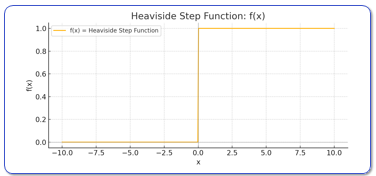

#### 레이어(층, Layer)
- 특정 유형의 연산 또는 변환을 수행하는 기능적 집합체
- 입력 데이터를 받아들여 고유한 연산과 변환 수행
- 결과를 다음 레이어로 전달


#### 입력층
- 원시 데이터를 직접 받아들이는 층
- 입력 형태와 형식을 지님
- 계산은 수행하지 않음
- 입력의 정합성을 주로 확인

#### 출력층: 최종 예측 결과 계산

- 이진 분류

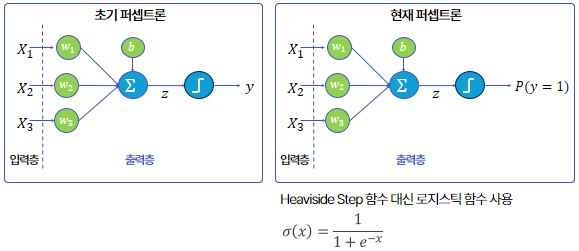

- 다중 분류

> 초기 퍼셉트론 은 One-Vs-One, One-Vs-Rest 방식 사용
> 
> 현재 퍼셉트론 은 스텝 함수로 소프트맥스를 사용하여 클래스별 확률로 출력
> 
> 소프트맥스(Softmax) 함수
>
> $\pi(\mathbf{z}) = \begin{pmatrix} \pi_1 \\ \pi_2 \\ \vdots \\ \pi_K \end{pmatrix}$ $\pi_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$


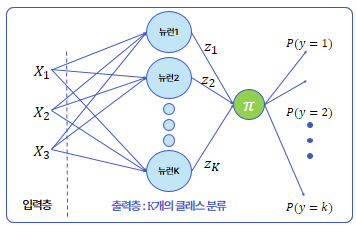

- 회귀: 스텝 함수 없이 바로 출력

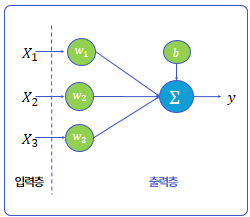

#### 퍼셉트론의 한계

- 선형 분리가 불가능한 패턴은 나타낼 수 없음 Ex) XOR 문제
- 퍼셉트론이 K 개의 입력으로 나타낼 수 있는 정보량 2K bits
$T(N, K) = \begin{cases} 2^N, & \text{if } K \geq N \\ 2\sum_{k=0}^{K-1} \binom{N-1}{k}, & \text{if } K < N \end{cases}$
> $T(N,K)$: N 개의 점을 K 개의 차원으로 분리하는 방법 수
>
> $T(N,K)/2^N$은 $N\le2K$ 일 때는 1에 가깝지만, $N > 2K$일 때는 0에 가까움

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

선형 함수로 분류가 가능한 2차원 분류 데이터셋 {X_lin, y_lin}과 
    
선형 함수로 분류가 가능하지 않은 2차원 분류 데이터셋 {X_nonlin, y_nonlin}을 두 개를 만듭니다. 

퍼셉트론을 사용하여 두 개의 데이터셋 분류 모델을 학습합니다. 두 개의 데이터셋에서 어떠한 분류면을 만들어 내는지 확인해봅니다.
    
</div>

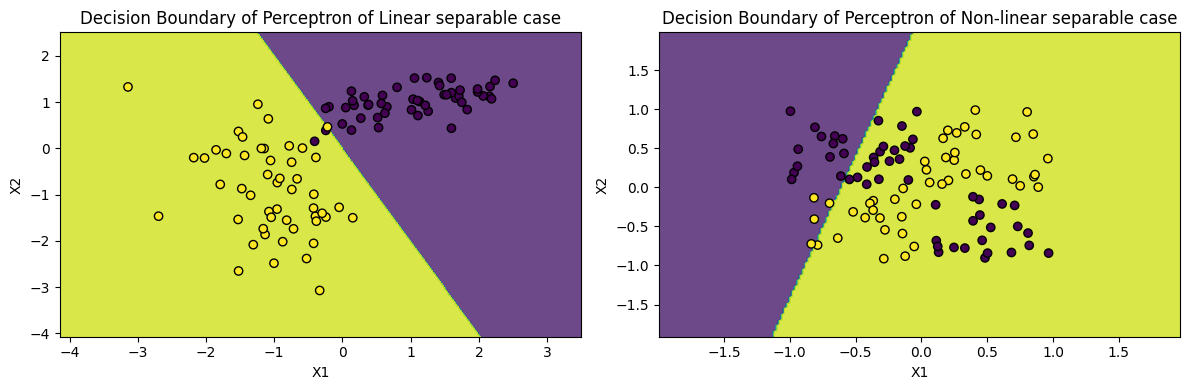

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

X_lin, y_lin = make_classification(
    n_samples=100, n_features=2, 
    n_informative=2, n_redundant = 0, n_repeated = 0,
    n_classes=2, n_clusters_per_class=1, random_state=123 
) # 두 개의 입력 변수를 지닌 선형 분류가 가능한 데이터셋을 만듭니다.

np.random.seed(123)
X_nonlin = np.random.rand(100, 2) * 2 - 1
y_nonlin = (X_nonlin[:, 0] * X_nonlin[:, 1] > 0).astype(int) # 바둑판 모양의 경계면을 지닌 선형 분류가 불가능한 데이터셋을 만듭니다.

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for (X, y), ax, title in zip(
    [(X_lin, y_lin), (X_nonlin, y_nonlin)],
    axes.ravel(), ['Linear separable case', 'Non-linear separable case']
):
    # 단일 레이어 퍼셉트론 모델 정의 및 학습
    clf_per = Perceptron(random_state=123)
    clf_per.fit(X, y)

    # 분류 평면 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf_per.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Decision Boundary of Perceptron of {}'.format(title))

plt.tight_layout()
plt.show()

### 2.  다층 퍼셉트론

#### 입력층, 출력층 사이에 하나 이상의 은닉층으로 구성된 신경망
- 퍼셉트론의 표현력 한계를 넘기 위해 제안됨
- 역전파(Backpropagation) 알고리즘
> 다층 퍼셉 트론 학습 알고리즘
> 
> 개념적 수준에 머물던 다층 퍼셉트론 연구의 전환점
- 보편 근사 정리(Universal Approximation Theorem)
> 적절한 뉴런 수와 가중치, 비선형 활성화 함수만 주어지면 하나의 은닉층으로 어떠한 함수도 근사화 가능


#### 은닉층
- 데이터를 변환하여 고차원적 특징 추출

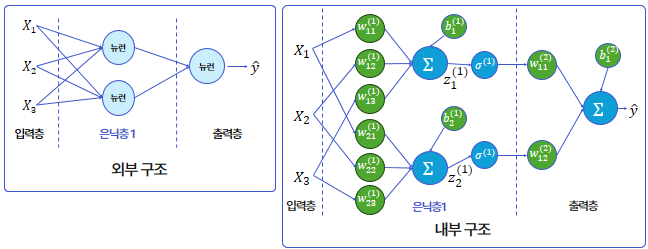

#### 활성화 함수가 없는 다층 퍼셉트론
- 활성화 함수가 없는 다층 퍼셉트론

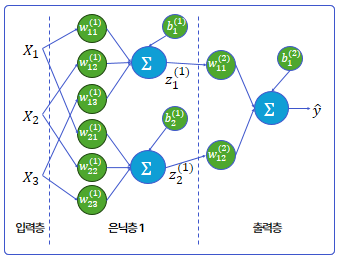


$(z_1^{(1)} \quad z_2^{(1)}) = W^{(1)} \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} + (b_1^{(1)} \quad b_2^{(1)})$

$W^{(1)} = \begin{pmatrix} w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\ w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \end{pmatrix}$

$\hat{y} = W^{(2)} \begin{pmatrix} z_1^{(1)} \\ z_2^{(1)} \end{pmatrix} + b_1^{(2)}$

$W^{(2)} = (w_{11}^{(2)} \quad w_{12}^{(2)})$

$\hat{y} = W^{(2)}W^{(1)} \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} + b$

$\Rightarrow$ 단일 퍼셉트론과 같음

#### 활성화 함수(Activation Function)
- 신경망 뉴런에 비선형성 부여
- 복잡하고 추상적인 표현 이 가능해짐

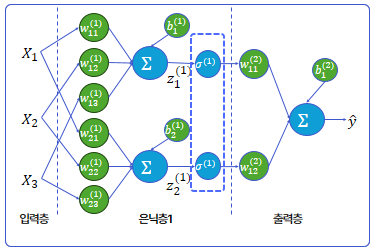

#### 활성화 함수(Activation Function)


| 활성화 함수 | Sigmoid | Tanh<br/>Hyperbolic Tangent | Relu<br/>Rectified Linear Unit | Lelu<br/>Leaky Relu |
| --- | --- | --- | --- | --- |
| 수식 |$$\sigma(𝑥)=\frac{1}{1+𝑒^{−𝑥}}$$|$$𝑡𝑎𝑛h(𝑥)=\frac{𝑒^𝑥−𝑒^{−𝑥}}{𝑒^𝑥+𝑒^{−𝑥}}$$|$$𝑟𝑒𝑙𝑢(𝑥)=max⁡(0,𝑥)$$|$$𝑙𝑒𝑙𝑢(𝑥;𝛼)=max(𝛼𝑥,𝑥)$$<br/>$$0<\alpha<1$$|

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
[Ex.1]에서 선형으로 나누지 못했던, {X_nonlin, y_nonlin} 데이터셋에서 다층 퍼셉트론 분류기를 만들과 결정 경계를 시각화합니다. 

이 때, 단층 퍼셉트론과, 다층 퍼셉트론에서 활성화 함수를 사용할 때와 하지 않을 때의 차이점을 비교해봅니다.
</div>

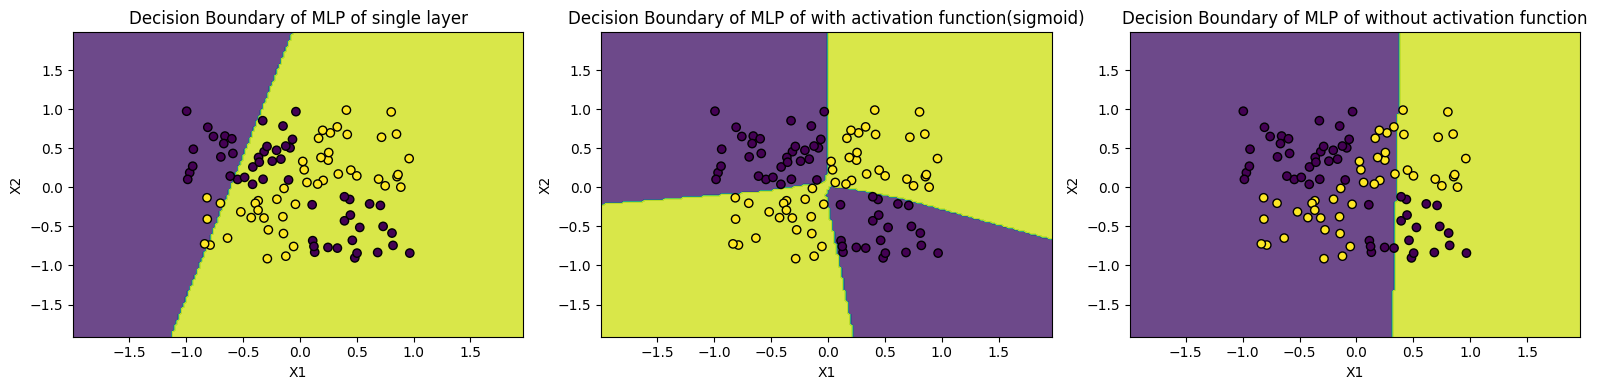

In [5]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for activation, ax, title in zip(
    ['single', 'relu', 'identity'],
    axes.ravel(), ['single layer', 'with activation function(sigmoid)', 'without activation function']
):
    if activation == 'single':
        clf_mlp = Perceptron(random_state=123)
        clf_mlp.fit(X, y)
    else:
        # 다층 퍼셉트론 모델 정의 및 학습
        clf_mlp = MLPClassifier(
            hidden_layer_sizes=[4, 2], learning_rate_init=0.01, random_state=123, activation=activation, max_iter=1000
        )
    clf_mlp.fit(X_nonlin, y_nonlin)

    # 분류 평면 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf_mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Decision Boundary of MLP of {}'.format(title))

plt.tight_layout()
plt.show()

#### 순전파(Forward Propagation): 예측값 계산

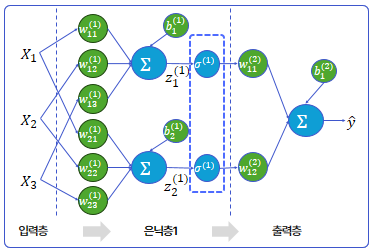

$\begin{pmatrix} z_1^{(1)} \\ z_2^{(1)} \end{pmatrix} = \sigma^{(1)} \left( W^{(1)} \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} + \begin{pmatrix} b_1^{(1)} \\ b_2^{(1)} \end{pmatrix} \right)$

$\hat{y} = W^{(2)} \begin{pmatrix} z_1^{(1)} \\ z_2^{(1)} \end{pmatrix} + \left( b_1^{(2)} \right)$

#### 역전파(Back Propagation): 경사도 계산

- 출력 변수와 대상 변수와의 손실의 경사도를 연쇄 법칙(Chain Rule)을 이용해 은닉층 방향으로 전파

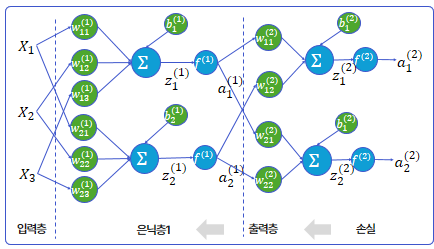

$L = \frac{1}{2}\left(\sum_{i=1}^{2} y_i - a_i^{(2)}\right)^2$

$\frac{\partial L}{\partial a_1^{(2)}} = -(y_1 - a_1^{(2)})$

$\nabla_{a^{(2)}} L = -\begin{pmatrix} y_1 - a_1^{(2)} \\ y_2 - a_2^{(2)} \end{pmatrix}$

$\frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}} = -(y - a_1^{(2)}) f^{(2)'}(z_1^{(2)})$

$\nabla_{z^{(2)}} L = -\begin{pmatrix} y_1 - a_1^{(2)} \\ y_2 - a_2^{(2)} \end{pmatrix} \circ \begin{pmatrix} f^{(2)'}(z_1^{(2)}) \\ f^{(2)'}(z_1^{(2)}) \end{pmatrix}$

$\delta^{(2)} = \nabla_{z^{(2)}} L = f^{(2)'}(z^{(2)}) \circ \nabla_{a^{(2)}} L$

$\frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial w_{11}^{(2)}} = -(y - a_1^{(2)}) f^{(2)'}(z_1^{(2)}) a_1^{(1)}$

$\nabla_{w_1^{(2)}} L = (\delta_1^{(2)} a_1^{(1)} \quad \delta_1^{(2)} a_2^{(1)})$

$\nabla_{w_2^{(2)}} L = (\delta_2^{(2)} a_1^{(1)} \quad \delta_2^{(2)} a_2^{(1)})$

$\nabla_{W^{(2)}} L = \begin{pmatrix} \delta_1^{(2)} \\ \delta_2^{(2)} \end{pmatrix} (a_1^{(1)} \quad a_2^{(1)}) = \delta^{(2)} (a^{(1)})^T$

$\nabla_{b^{(2)}} L = \begin{pmatrix} \delta_1^{(2)} \\ \delta_2^{(2)} \end{pmatrix} = \delta^{(2)}$

$\delta^{(2)} = f^{(2)'}(z^{(2)}) \circ \nabla_{a^{(2)}} L$

$\delta^{(1)} = f^{(1)'}(z^{(1)}) \circ \nabla_{a^{(1)}} L$

$\nabla_{a^{(1)}} L = (W^{(2)})^T \delta^{(2)}$

$\frac{\partial L}{\partial a_1^{(1)}} = \delta_1^{(2)} w_{11}^{(2)} + \delta_2^{(2)} w_{21}^{(2)} = (w_{11}^{(2)} \quad w_{21}^{(2)}) \delta^{(2)}$

$\frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}} \frac{\partial z_1^{(2)}}{\partial a_1^{(1)}} = -(y - a_1^{(2)}) f^{(2)'}(z_1^{(2)}) w_{11}^{(2)}$

$\frac{\partial L}{\partial a_1^{(2)}} \frac{\partial a_1^{(2)}}{\partial z_2^{(2)}} \frac{\partial z_2^{(2)}}{\partial a_1^{(1)}} = -(y - a_2^{(2)}) f^{(2)'}(z_2^{(2)}) w_{21}^{(2)}$

$\frac{\partial L}{\partial a_2^{(1)}} = \delta_1^{(2)} w_{21}^{(2)} + \delta_2^{(2)} w_{22}^{(2)} = (w_{21}^{(2)} \quad w_{22}^{(2)}) \delta^{(2)}$

$\delta^{(2)} = f^{(2)'}(z^{(2)}) \circ \nabla_{a^{(2)}} L$

$\delta^{(1)} = f^{(1)'}(z^{(1)}) \circ (W^{(2)})^T \delta^{(2)}$

$\nabla_{W^{(1)}} L = \delta^{(1)} X^T$

$\nabla_{b^{(1)}} L = \delta^{(1)}$

- n 층의 퍼셉트론

$\delta^{(n)} = f^{(n)'}(z^{(n)}) \circ \nabla_{a^{(n)}} L$

> $\nabla_{W^{(n)}} L = \delta^{(n)} a^{(i)}$,  $\nabla_{b^{(n)}} L = \delta^{(n)}$

$\delta^{(n-1)} = f^{(n-1)'}(z^{(n-1)}) \circ (W^{(n)})^T \delta^{(n)}$

> $\nabla_{W^{(n-1)}} L = \delta^{(n-1)} a^{(i-1)}$,  $\nabla_{b^{(n-1)}} L = \delta^{(n-1)}$

$\vdots$

$\delta^{(1)} = f^{(1)'}(z^{(1)}) \circ (W^{(2)})^T \delta^{(2)}$

> $\nabla_{W^{(1)}} L = \delta^{(1)} X^T$, $\nabla_{b^{(1)}} L = \delta^{(1)}$

#### 기울기 소실 문제(Vanishing Gradient Problem)
- 이전 층으로 손실을 전파하는 과정에서 작은 값이 곱해질 때 기울기의 소실이 쉽게 발생

- 출력층과 멀어질수록 기울기 소실 문제 가능성 증가

$\Rightarrow$ 층이 깊어질수록 기울기 소실 문제 가능성 증가


- 활성화 함수 Sigmoid 나 Tanh 는 양쪽 끝으로 갈수록 기울기가 작아짐
- 기울기 소실 문제 야기

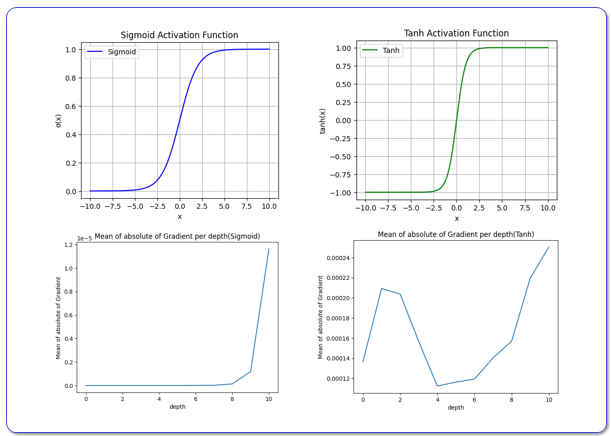

- ReLU: Sigmoid, Tanh가 지니는 기울기 소실 문제 완화
> 반면, ReLU 는 기울기가 0 인 경우가 많고, 모두 0 이 된다면 출력이 Dead Neuron(Unit)이 됨
> 
> $\Rightarrow$ 보완책으로 Leaky ReLU

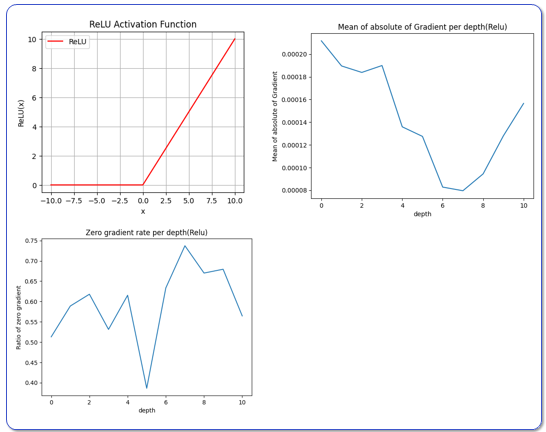

#### 활성화 함수 비교

| 활성화 함수 | Sigmoid | Tanh<br/>Hyperbolic Tangent | ReLU<br/>Rectified Linear Unit | LeLU<br/>Leaky ReLU |
| --- | --- | --- | --- | --- |
| 장점 | 확률 해석에 적합 | 출력값의 중심이 0 이기 때문에 학습 안정성이 Sigmoid 에 비해 높음 | 간단하여 빠름<br/>기울기 문제에 대응 | 죽은 뉴런 문제 완화|
| 단점 | 기울기 소실 유발<br/>출력값의 중심이 0 이 아니므로 학습 안정성 감소 | 기울기 소실 유발 | 죽은 뉴런 문제 발생 가능성이 있음 | ReLU 보다 연산이 약간 더 필요|


**[Ex.3]**

퍼셉트론에도 연결 함수(Link function)을 써서 분류 모델로 만들 수 있습니다. 분류 모델의 오류 역전파 과정을 정리해봅니다. 

출력 레이어의 

출력에 로지스틱 회귀와 같이 로지스틱 함수를 연결 함수로 만듭니다.

> $logit = X_2 W_3 + b_3$
>
> $\hat{y} = \frac{1}{1 + e^{-logit}}$

이진 크로스 엔트로피(Binary cross entorpy)를 손실 함수로 사용하면,

> $Loss(y, \hat{y}) = - \frac{1}{n}\sum_{i=1}^n \left(y_i log \hat{y_i} - (1 - y_i)log(1 - \hat{y_i}) \right)$
>
> $\frac{dL}{d\hat{y}} = \frac{1}{n}\frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}$
>
> $\frac{d\hat{y}}{d logit} = \hat{y}(1 - \hat{y})$

아래와 같이 층에 의한 오차를 계산할 수 있습니다.

> $prop = \frac{dL}{d logit} = \frac{\hat{y} - y}{n}$

이 과정을 반영하여 오류 역전파를 직접 구현해보고, {X_nonlin, y_nonlin} 셋에 적용해봅니다.

In [6]:
from scipy.special import expit # sigmoid 함수

def forward_prop(X, weights, bias):
    """
    순전파를 합니다.
    Parameters:
        X: np.ndarray
            입력 행렬
        weights: list
            층별 가중치
        bias: list
            층별 절편
    Returns:
        np.ndarray, list
            출력값, 층별 입력 행렬
    """
    # sigmoid 함수의 미분을 구하기 위해 각 스텝의 입력을 저장합니다.
    X_step = [X]
    for w, b in zip(weights[:-1], bias[:-1]):
        X = expit(np.dot(X, w) + b)
        X_step.append(X) # 층의 출력을 X_step에 저정합니다.
    y_hat = expit(np.dot(X, weights[-1]) + bias[-1]) # 마지막 층입니다.
    return y_hat, X_step

def back_prop(weights, bias, y, y_hat, X_step):
    """
    역전파를 합니다.
    Parameters:
        weights: list
            층별 가중치
        bias: list
            층별 절편
        y: np.ndarray
            대상 변수
        y_hat: np.ndaarray
            예측 확률(Positive)
        X_step: list
            층별 입력
    """
    n = y.shape[0]
    # 출력층의 경사를 계산합니다.
    prop = (y_hat - y) / n
    dW = np.dot(X_step[-1].T, prop)
    db = np.sum(prop, axis=0)
    # 이전 층으로 전파할 변이량을 계산 합니다.
    prop = np.dot(prop, weights[-1].T)
    dWs, dbs = [dW], [db] # 각 층의 가중치와 절편의 경사를 저장합니다.
    for w, X_s, X_s2 in zip(weights[-2::-1], X_step[::-1], X_step[-2::-1]):
        # 변이량에 활성화 함수(sigmoid)의 미분을 곱합니다.
        prop = prop * (X_s * (1 - X_s))
        dW = np.dot(X_s2.T, prop)
        db = np.sum(prop, axis=0)
        dWs.append(dW)
        dbs.append(db)
        # 이전 층으로 전파할 변이량을 계산 합니다.
        prop = np.dot(prop, w.T)
    # 방향을 반대로하여, 입력층에서 출력층 방향으로 나열 시킵니다.
    dWs.reverse()
    dbs.reverse()
    return dWs, dbs 

def update_params(weights, bias, d_weights, d_bias, rate):
    # 가중치(절편 포함)들을 계산된 경사도로 업데이트 합니다.
    for w, b, dw, db in zip(weights, bias, d_weights, d_bias):
        w -= rate * dw
        b -= rate * db 

In [7]:
from sklearn.metrics import log_loss, accuracy_score
X = X_nonlin
y = np.expand_dims(y_nonlin, axis=-1)
units = [4, 2]
size = [X.shape[1]] + units + [1]
np.random.seed(12)

# He Uniform 방식으로 가중치를 초기화합니다.
weights = [np.random.uniform(-(6 / (i + o)) ** 0.5, (6 / (i + o)) ** 0.5, size=(i, o)) 
           for i, o in zip(size[:-1], size[1:])]
bias = [np.zeros(i) for i in size[1:]]

learning_rate = 1 # 학습율 입니다.

# 손실과 성능을 기록합니다.
loss_hist, accuracy_hist = list(), list()
for i in range(3000):
    y_hat, X_step = forward_prop(X, weights, bias)
    d_weights, d_bias = back_prop(weights, bias, y, y_hat, X_step)
    update_params(weights, bias, d_weights, d_bias, learning_rate)
    loss_hist.append(log_loss(y, y_hat))
    accuracy_hist.append(accuracy_score(y, y_hat > 0.5))

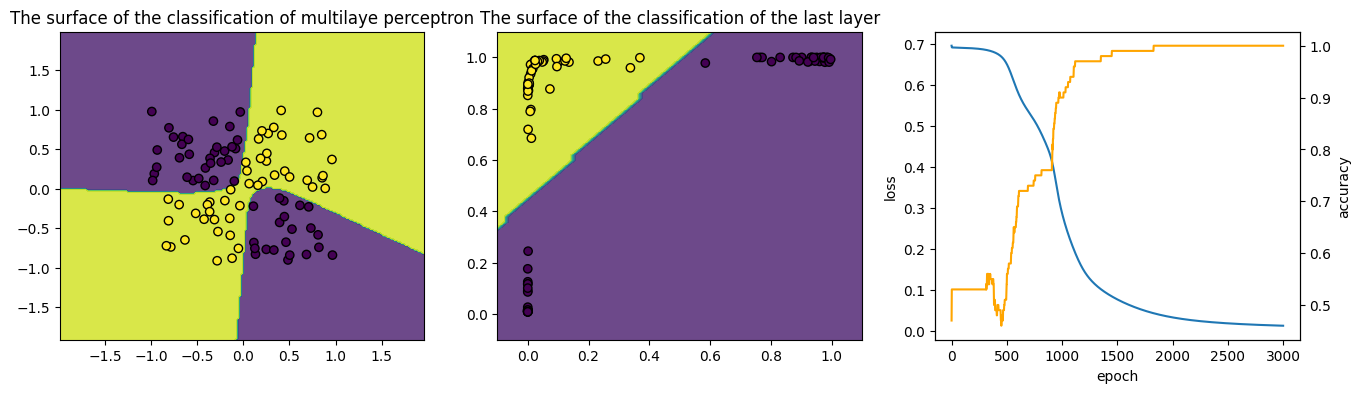

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16 , 4))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z, _ =  forward_prop(np.c_[xx.ravel(), yy.ravel()], weights, bias)
Z = Z.reshape(xx.shape)
Z = Z > 0.5

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
axes[0].set_title('The surface of the classification of multilaye perceptron')

xx, yy = np.meshgrid(np.arange(-0.1, 1.1, 0.02), np.arange(-0.1, 1.1, 0.02))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights[-1]) + bias[-1]
Z = Z.reshape(xx.shape)
Z = Z > 0
axes[1].contourf(xx, yy, Z, alpha=0.8)
axes[1].scatter(X_step[-1][:, 0], X_step[-1][:, 1], c=y, marker='o', edgecolors='k')
axes[1].set_title('The surface of the classification of the last layer')

axes[2].plot(loss_hist)
tax = axes[2].twinx()
tax.plot(accuracy_hist, color='orange')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('loss')
tax.set_ylabel('accuracy')
plt.show()